In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import os, re
import string
import nltk 
from nltk.corpus import stopwords

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [4]:
train.shape,test.shape

((25000, 2), (25000, 3))

In [5]:
train.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [6]:
test.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
print(train.columns)

Index(['id', 'review'], dtype='object')


In [8]:
print(train.head())

         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...


In [15]:
print ("number of rows for sentiment 1: {}".format(len(train[train.sentiment == 1])))
print ( "number of rows for sentiment 0: {}".format(len(train[train.sentiment == 0])))

number of rows for sentiment 1: 12500
number of rows for sentiment 0: 12500


In [16]:
train.groupby('sentiment').describe().transpose()

sentiment                                                      0  \
id     count                                               12500   
       unique                                              12500   
       top                                                7759_3   
       freq                                                    1   
review count                                               12500   
       unique                                              12432   
       top     When i got this movie free from my job, along ...   
       freq                                                    3   

sentiment                                                      1  
id     count                                               12500  
       unique                                              12500  
       top                                                5814_8  
       freq                                                    1  
review count                                               12500  
       unique                                              12472  
       top     Everyone knows about this ''Zero Day'' event. ...  
       freq                                                    2

In [17]:
#Creating a new col
train['length'] = train['review'].apply(len)
train.head()

,id,sentiment,review,length
0,5814_8,1,With all this stuff going down at the moment w...,2302
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449
3,3630_4,0,It must be assumed that those who praised this...,2245
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231


<Axes: ylabel='Frequency'>

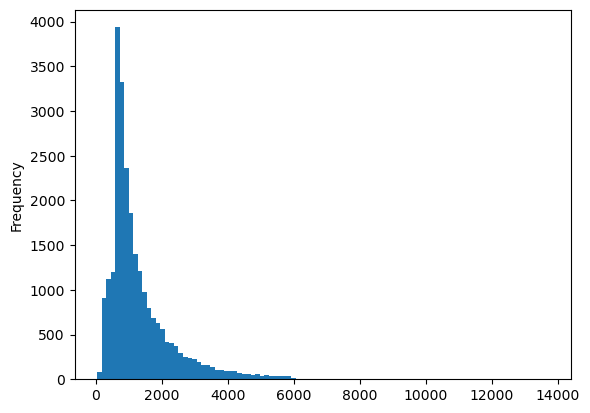

In [18]:
train['length'].plot.hist(bins=100)

In [19]:
train.length.describe()

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: length, dtype: float64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

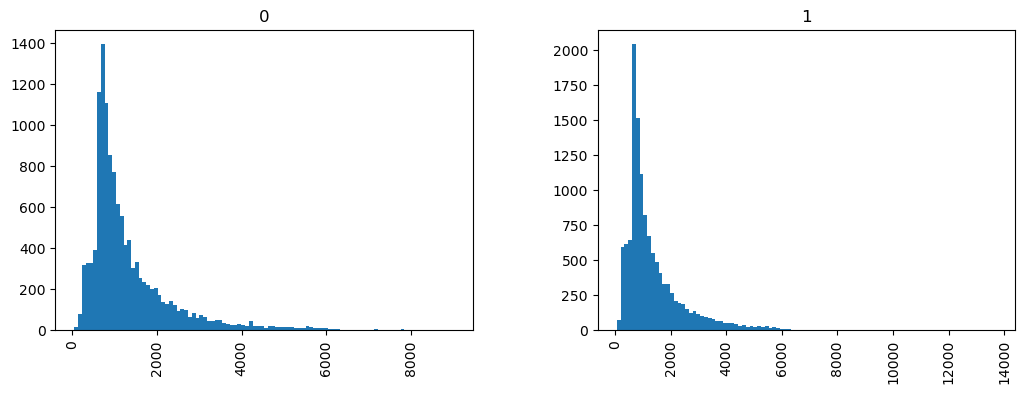

In [20]:
train.hist(column='length', by='sentiment', bins=100,figsize=(12,4))

In [21]:
from bs4 import BeautifulSoup

#Creating a function for cleaning of data
def clean_text(raw_text):
    # 1. remove HTML tags
    raw_text = BeautifulSoup(raw_text).get_text() 
    
    # 2. removing all non letters from text
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create variable which contain set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop word & returning   
    return [w for w in words if not w in stops]

In [23]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roshe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
train['clean_review']=train['review'].apply(clean_text)
train['length_clean_review'] = train['clean_review'].apply(len)
train.head()

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


,id,sentiment,review,length,clean_review,length_clean_review
0,5814_8,1,With all this stuff going down at the moment w...,2302,"[stuff, going, moment, mj, started, listening,...",219
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,"[classic, war, worlds, timothy, hines, enterta...",84
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,"[film, starts, manager, nicholas, bell, giving...",240
3,3630_4,0,It must be assumed that those who praised this...,2245,"[must, assumed, praised, film, greatest, filme...",189
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,"[superbly, trashy, wondrously, unpretentious, ...",210


In [28]:
print(train[train['length_clean_review'] == 4]['review'].iloc[0])
print('------After Cleaning------')
print(train[train['length_clean_review'] == 4]['clean_review'].iloc[0])

This movie is terrible but it has some good effects.
------After Cleaning------
['movie', 'terrible', 'good', 'effects']


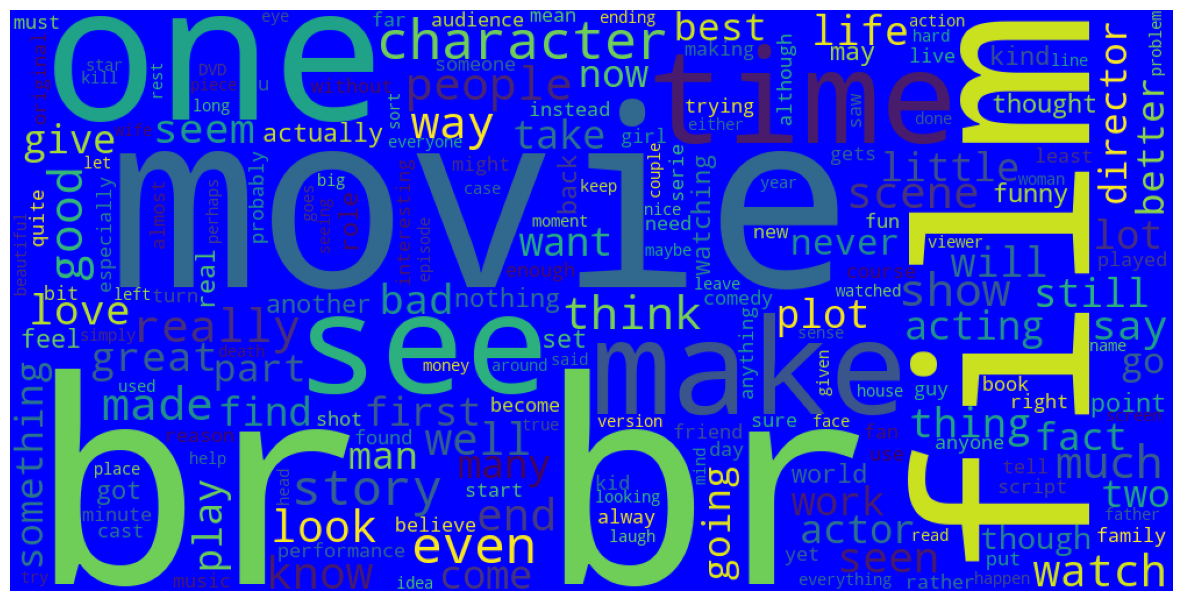

In [30]:
#Plot wordcloud
word_cloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'blue').generate(
                        ''.join(train['review']))

plt.figure(figsize = (15,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_transform=CountVectorizer(analyzer=clean_text).fit(train['review'])
print(len(bow_transform.vocabulary_))

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


74065


In [33]:
review1 = train['review'][1]
print(review1)


\The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \"critics\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \"critics\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \"critics\" perceive to be its shortcomings."


In [34]:
bow1 = bow_transform.transform([review1])
print(bow1)
print(bow1.shape)

  (0, 1153)	1
  (0, 1860)	1
  (0, 2877)	1
  (0, 5089)	1
  (0, 7345)	2
  (0, 11671)	3
  (0, 12493)	1
  (0, 14613)	1
  (0, 14617)	3
  (0, 14782)	1
  (0, 17310)	1
  (0, 19658)	1
  (0, 19759)	1
  (0, 20008)	2
  (0, 20901)	1
  (0, 21030)	1
  (0, 21035)	2
  (0, 21147)	1
  (0, 21748)	1
  (0, 21754)	1
  (0, 21757)	1
  (0, 22499)	1
  (0, 22584)	1
  (0, 22585)	1
  (0, 22788)	1
  :	:
  (0, 45216)	1
  (0, 45629)	2
  (0, 46521)	1
  (0, 46850)	1
  (0, 48251)	1
  (0, 48288)	1
  (0, 50446)	1
  (0, 51816)	1
  (0, 52690)	1
  (0, 53240)	1
  (0, 54251)	1
  (0, 58936)	1
  (0, 59991)	1
  (0, 61334)	1
  (0, 61943)	1
  (0, 63259)	1
  (0, 65725)	1
  (0, 66191)	1
  (0, 66463)	1
  (0, 70380)	1
  (0, 71340)	1
  (0, 71498)	1
  (0, 71821)	2
  (0, 72911)	1
  (0, 73396)	1
(1, 74065)


In [35]:
#Creating bag of words for our review variable
review_bow = bow_transform.transform(train['review'])

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


In [36]:
print('Shape of sparse matrix',review_bow.shape)
print('amount of non - zero occurence',review_bow.nnz)

Shape of sparse matrix (25000, 74065)
amount of non - zero occurence 2450404


In [37]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.1323380274083575


In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 73396)	0.061582405387422844
  (0, 72911)	0.10916204090045824
  (0, 71821)	0.24678226776886478
  (0, 71498)	0.06130848347869254
  (0, 71340)	0.07054912976037264
  (0, 70380)	0.06691025207731116
  (0, 66463)	0.08376908496574231
  (0, 66191)	0.11391853286104583
  (0, 65725)	0.05408056138661737
  (0, 63259)	0.1047755178999042
  (0, 61943)	0.08811567227327795
  (0, 61334)	0.11302952635114163
  (0, 59991)	0.10986956065151147
  (0, 58936)	0.11997053429431336
  (0, 54251)	0.11268631063864525
  (0, 53240)	0.13073660913364496
  (0, 52690)	0.0824732205199774
  (0, 51816)	0.05986262652464556
  (0, 50446)	0.077539268028452
  (0, 48288)	0.13122486190259133
  (0, 48251)	0.04143735557967593
  (0, 46850)	0.11689701180182505
  (0, 46521)	0.06665775481300043
  (0, 45629)	0.14376840111740952
  (0, 45216)	0.08006252757098449
  :	:
  (0, 22788)	0.10110289576849556
  (0, 22585)	0.13850169616266522
  (0, 22584)	0.10403788202119751
  (0, 22499)	0.05424308473387671
  (0, 21757)	0.06083289839379746
  (0, 2

In [39]:
print(tfidf_transformer.idf_[bow_transform.vocabulary_['war']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['book']])

4.070495818949949
3.8577509748566374


In [40]:
review_tfidf = tfidf_transformer.transform(review_bow)
print(review_tfidf.shape)

(25000, 74065)


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['review'], train['sentiment'], test_size=0.22, random_state=101)

len(X_train), len(X_test), len(X_train) + len(X_test)

(19500, 5500, 25000)

In [42]:
from sklearn.metrics import classification_report
#Predicting & Stats Function
def pred(predicted,compare):
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          9042   682
1           499  9277

Classification paradox :------->>
Accuracy :-  93.94

False Negative Rate :-  5.1

False Postive Rate :-  7.01

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9724
           1       0.93      0.95      0.94      9776

    accuracy                           0.94     19500
   macro avg       0.94      0.94      0.94     19500
weighted avg       0.94      0.94      0.94     19500



In [45]:
predictions=pipeline.predict(X_test)

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          9054   670
1           843  8933

Classification paradox :------->>
Accuracy :-  92.24

False Negative Rate :-  8.62

False Postive Rate :-  6.89

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9724
           1       0.93      0.91      0.92      9776

    accuracy                           0.92     19500
   macro avg       0.92      0.92      0.92     19500
weighted avg       0.92      0.92      0.92     19500



In [47]:
predictions=pipeline.predict(X_test)

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          9054   670
1           843  8933

Classification paradox :------->>
Accuracy :-  92.24

False Negative Rate :-  8.62

False Postive Rate :-  6.89

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9724
           1       0.93      0.91      0.92      9776

    accuracy                           0.92     19500
   macro avg       0.92      0.92      0.92     19500
weighted avg       0.92      0.92      0.92     19500



In [49]:
#Saving Output
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_logit = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline_logit.fit(train['review'],train['sentiment'])
test['sentiment'] = pipeline_logit.predict(test['review'])

C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\roshe\AppData\Local\Temp\ipykernel_23416\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


In [50]:
test.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,0,Superbly trashy and wondrously unpretentious 8...


In [51]:
test.columns

Index(['id', 'sentiment', 'review'], dtype='object')

In [52]:
output = test[['id','sentiment']]
print(output)

            id  sentiment
0       5814_8          1
1       2381_9          1
2       7759_3          0
3       3630_4          0
4       9495_8          0
...        ...        ...
24995   3453_3          0
24996   5064_1          0
24997  10905_3          0
24998  10194_3          0
24999   8478_8          1

[25000 rows x 2 columns]


In [53]:
output.to_csv("output.csv", index=False, quoting=3, escapechar='\\')